## Medical charge data set

In [3]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

In [4]:
med_charges = pd.read_csv('data/insurance2.csv')

In [5]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__ 

In [6]:
np.random.seed(47)
N_rep = 10000
bs_replicates = np.empty(N_rep)

for i in range(N_rep): 
    bs_sample = np.random.choice(med_charges.charges, size=len(med_charges))
    bs_replicates[i] = np.mean(bs_sample) 

bs_ci_lower = np.percentile(a=bs_replicates, q=5)
bs_ci_lower

12724.467921704

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

In [7]:
bs_std_diff = np.empty(N_rep)

insured = med_charges.charges[med_charges.insuranceclaim == 1]
non_insured = med_charges.charges[med_charges.insuranceclaim == 0]

for i in range(N_rep): 
    bs_insured         = np.random.choice(insured, size=len(med_charges))
    bs_non_insured     = np.random.choice(non_insured, size=len(med_charges))
    bs_insured_std     = np.std(bs_insured)
    bs_non_insured_std = np.std(bs_non_insured)
    
    bs_std_diff[i] = bs_insured_std - bs_non_insured_std 

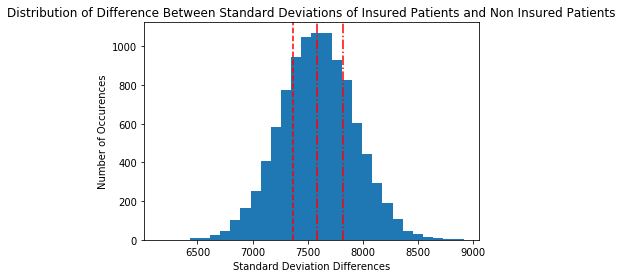

In [8]:
_ = plt.hist(bs_std_diff, bins=30)
_ = plt.xlabel('Standard Deviation Differences')
_ = plt.ylabel('Number of Occurences')
_ = plt.title('Distribution of Difference Between Standard Deviations' + 
              ' of Insured Patients and Non Insured Patients')

percentiles = np.percentile(bs_std_diff, q=[2.5, 25, 50, 75, 97.5])
_ = plt.axvline(percentiles[1], color='r', linestyle='--') # 25th percentile
_ = plt.axvline(percentiles[2], color='r', linestyle='-.') # 50th percentile
_ = plt.axvline(percentiles[3], color='r', linestyle='-.') # 75th percentile

In [9]:
print(f"The lower bound of the confidence interval is {percentiles[0]: 0.2f} while" + 
      f" the upper bound of the confidence interval is {percentiles[4]: 0.2f}.")

The lower bound of the confidence interval is  6936.48 while the upper bound of the confidence interval is  8241.28.


The null hypothesis here states that there is no difference in the standard deviations of the medical costs of insured patients versus non-insured patients and that any differences are due to chance. The alternative hypothesis states that there is a difference. Because this interval does not contain zero, we can say with a 95% confidence that there will be a difference between the charges somewhere between 6936.48 and 8241.28.  

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

In [27]:
bs_mean_diff = np.empty(N_rep)

insured     = med_charges.charges[med_charges.insuranceclaim == 1]
non_insured = med_charges.charges[med_charges.insuranceclaim == 0]

mean_charges       = np.mean(med_charges.charges)
insured_shifted    = insured - np.mean(insured) + mean_charges
noninsured_shifted = non_insured - np.mean(non_insured) + mean_charges

for i in range(N_rep): 
    bs_insured      = np.random.choice(insured_shifted, size=len(med_charges))
    bs_noninsured   = np.random.choice(noninsured_shifted, size=len(med_charges))
    bs_mean_diff[i] = np.mean(bs_insured) - np.mean(bs_non_insured)

In [25]:
alpha = 0.05
emperical_mean_diff = np.mean(insured) - np.mean(non_insured)
p = np.sum(bs_mean_diff >= emperical_mean_diff) / len(bs_mean_diff)
p

0.0

The null hypothesis states that there is no difference between the difference in means between the insured patients and non-insured patients. The alternative hypothesis states that there is a difference. Because the p value is less than that of the alpha value, we choose to reject the null-hypothesis. 

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

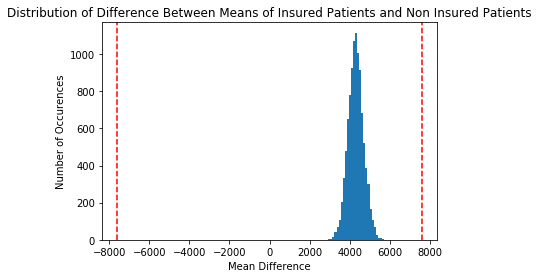

In [28]:
_ = plt.hist(bs_mean_diff, bins=30)
_ = plt.xlabel('Mean Difference')
_ = plt.ylabel('Number of Occurences')
_ = plt.title('Distribution of Difference Between Means' + 
              ' of Insured Patients and Non Insured Patients')


_ = plt.axvline(emperical_mean_diff, color='r', linestyle='--') # 25th percentile
_ = plt.axvline(-emperical_mean_diff, color='r', linestyle='--') # 25th percentile

We plot two lines because we want to check both tails of the distribution. 

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

No, because the probability of observing a random difference as large as what we did is almost zero. 

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

I would rather use bootstrapping. While it does require more steps than using the scipy.stats function `ttest_ind`, it is more intuitive and makes more sense. 

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

Yes, you would perform a two-sided test as above because you want to check whether the new algorithm is performing better or worse than the previous algorithm. Your null hypothesis would be that there is no difference in the click-through rate for both the current and new algorithm. The alternative hypothesis would be that the new algorithm performs differently, either for better or worse. The real-world consequence of rejecting the null hypothesis would be that the ad-recommender team might have used a lot of money on creating an algorithm that performs worse than the original, or it could potentially have created an ad that increases the revenue of the company.    